In [261]:
#implement all things we learned(till ml7.ipynb)in a new dataset,
import numpy as np
import pandas as pd

In [262]:
data=pd.read_csv("odev_tenis.csv")
df=data.copy()
df

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [263]:
#check for null values
df.isna().sum()

outlook        0
temperature    0
humidity       0
windy          0
play           0
dtype: int64

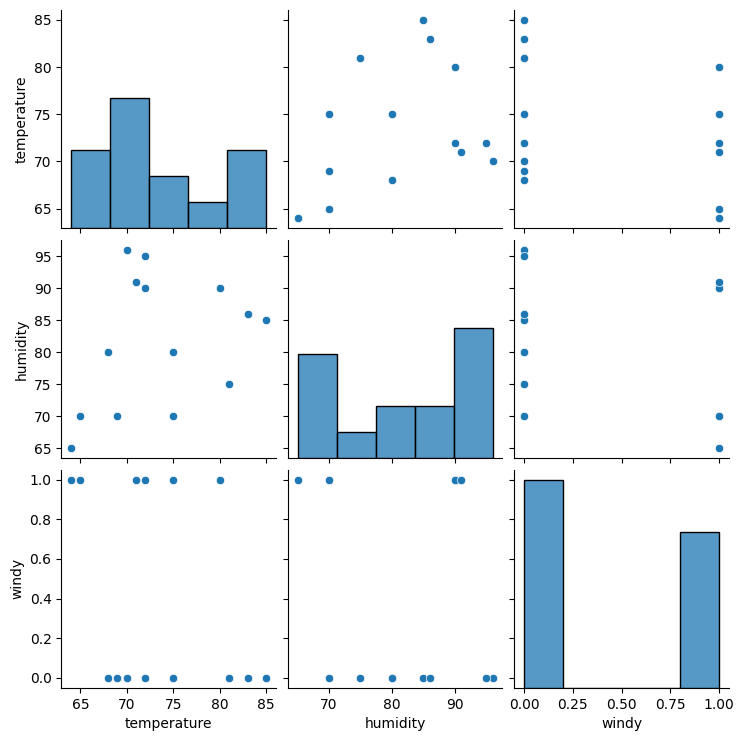

In [264]:
#investigate the relationships among columns
import seaborn as sbn

sbn.pairplot(data=df)

In [265]:
#turn categorical values into numerical values
#start with outlook, it is nominal categorical val,ohe is better
df["outlook"].unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

In [266]:
#ohe for outlook 

from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(handle_unknown="ignore",sparse_output=False).set_output(transform="pandas")

encoded_data=ohe.fit_transform(df[["outlook"]])
encoded_data

,outlook_overcast,outlook_rainy,outlook_sunny
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [267]:
#eliminate dummy variables and concat

df=pd.concat([df,encoded_data],axis=1).drop(columns=["outlook","outlook_sunny"])
df

,temperature,humidity,windy,play,outlook_overcast,outlook_rainy
0,85,85,False,no,0.0,0.0
1,80,90,True,no,0.0,0.0
2,83,86,False,yes,1.0,0.0
3,70,96,False,yes,0.0,1.0
4,68,80,False,yes,0.0,1.0
5,65,70,True,no,0.0,1.0
6,64,65,True,yes,1.0,0.0
7,72,95,False,no,0.0,0.0
8,69,70,False,yes,0.0,0.0
9,75,80,False,yes,0.0,1.0


In [268]:
#encode windy column, it is again nominal categorical but values will be binary 0 and 1
#so one hot encoder doesn't provide us any advantage

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

columns=["windy","play"]

df[columns]=df[columns].apply(lambda col:le.fit_transform(col))
df

,temperature,humidity,windy,play,outlook_overcast,outlook_rainy
0,85,85,0,0,0.0,0.0
1,80,90,1,0,0.0,0.0
2,83,86,0,1,1.0,0.0
3,70,96,0,1,0.0,1.0
4,68,80,0,1,0.0,1.0
5,65,70,1,0,0.0,1.0
6,64,65,1,1,1.0,0.0
7,72,95,0,0,0.0,0.0
8,69,70,0,1,0.0,0.0
9,75,80,0,1,0.0,1.0


In [269]:
df=df.rename(columns={"play":"play_yes","windy":"isWindy"})
df

,temperature,humidity,isWindy,play_yes,outlook_overcast,outlook_rainy
0,85,85,0,0,0.0,0.0
1,80,90,1,0,0.0,0.0
2,83,86,0,1,1.0,0.0
3,70,96,0,1,0.0,1.0
4,68,80,0,1,0.0,1.0
5,65,70,1,0,0.0,1.0
6,64,65,1,1,1.0,0.0
7,72,95,0,0,0.0,0.0
8,69,70,0,1,0.0,0.0
9,75,80,0,1,0.0,1.0


In [270]:
#x 
x=df.iloc[:,[0,2,3,4,5]]
x

,temperature,isWindy,play_yes,outlook_overcast,outlook_rainy
0,85,0,0,0.0,0.0
1,80,1,0,0.0,0.0
2,83,0,1,1.0,0.0
3,70,0,1,0.0,1.0
4,68,0,1,0.0,1.0
5,65,1,0,0.0,1.0
6,64,1,1,1.0,0.0
7,72,0,0,0.0,0.0
8,69,0,1,0.0,0.0
9,75,0,1,0.0,1.0


In [271]:
#y humidity

y=df.iloc[:,1]
y

0     85
1     90
2     86
3     96
4     80
5     70
6     65
7     95
8     70
9     80
10    70
11    90
12    75
13    91
Name: humidity, dtype: int64

In [272]:
#train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [273]:
x_train


,temperature,isWindy,play_yes,outlook_overcast,outlook_rainy
13,71,1,0,0.0,1.0
9,75,0,1,0.0,1.0
1,80,1,0,0.0,0.0
7,72,0,0,0.0,0.0
10,75,1,1,0.0,0.0
3,70,0,1,0.0,1.0
0,85,0,0,0.0,0.0
5,65,1,0,0.0,1.0
12,81,0,1,1.0,0.0


In [274]:
y_train

13    91
9     80
1     90
7     95
10    70
3     96
0     85
5     70
12    75
Name: humidity, dtype: int64

In [275]:
x_test

,temperature,isWindy,play_yes,outlook_overcast,outlook_rainy
8,69,0,1,0.0,0.0
6,64,1,1,1.0,0.0
4,68,0,1,0.0,1.0
11,72,1,1,1.0,0.0
2,83,0,1,1.0,0.0


In [276]:
y_test

8     70
6     65
4     80
11    90
2     86
Name: humidity, dtype: int64

In [277]:
#apply linear regression

from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()

linear_reg.fit(x_train,y_train)

lr_y_predicted=linear_reg.predict(x_test)

lr_y_predicted


array([84.45365573, 63.93839954, 85.76050662, 64.21013241, 75.06793322])

In [278]:
#contrast y_predicted and real y values
y_test

8     70
6     65
4     80
11    90
2     86
Name: humidity, dtype: int64

In [279]:
print(linear_reg.coef_)
x.columns

[  0.03396661 -10.48416811  -7.31030512  -9.86125504   1.3408175 ]


Index(['temperature', 'isWindy', 'play_yes', 'outlook_overcast',
       'outlook_rainy'],
      dtype='object')

In [280]:
linear_reg.intercept_

89.42026482441001

In [281]:
linear_reg.score(x_train,y_train)

0.3859719009445104

In [282]:
linear_reg.score(x_test,y_test)

-1.3108047443640718

In [283]:
#error rate calculation

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_test,lr_y_predicted))
print(mean_squared_error(y_test,lr_y_predicted))
print(r2_score(y_test,lr_y_predicted))

11.599539435808866
205.56919005862784
-1.3108047443640718


In [284]:
#check out p values of the columns, then use backward elimination
#p values should be as less as possible 
#predict humidity

import statsmodels.api as sm

# equation for multiple linear regression [   Y=B0+B1X1+B2X2+B3X3+ERROR_RATE ]
# add b0 value here 

BO=np.append(arr=np.ones((14,1)).astype(int),values=df,axis=1)
BO


array([[ 1., 85., 85.,  0.,  0.,  0.,  0.],
       [ 1., 80., 90.,  1.,  0.,  0.,  0.],
       [ 1., 83., 86.,  0.,  1.,  1.,  0.],
       [ 1., 70., 96.,  0.,  1.,  0.,  1.],
       [ 1., 68., 80.,  0.,  1.,  0.,  1.],
       [ 1., 65., 70.,  1.,  0.,  0.,  1.],
       [ 1., 64., 65.,  1.,  1.,  1.,  0.],
       [ 1., 72., 95.,  0.,  0.,  0.,  0.],
       [ 1., 69., 70.,  0.,  1.,  0.,  0.],
       [ 1., 75., 80.,  0.,  1.,  0.,  1.],
       [ 1., 75., 70.,  1.,  1.,  0.,  0.],
       [ 1., 72., 90.,  1.,  1.,  1.,  0.],
       [ 1., 81., 75.,  0.,  1.,  1.,  0.],
       [ 1., 71., 91.,  1.,  0.,  0.,  1.]])

In [285]:
df

,temperature,humidity,isWindy,play_yes,outlook_overcast,outlook_rainy
0,85,85,0,0,0.0,0.0
1,80,90,1,0,0.0,0.0
2,83,86,0,1,1.0,0.0
3,70,96,0,1,0.0,1.0
4,68,80,0,1,0.0,1.0
5,65,70,1,0,0.0,1.0
6,64,65,1,1,1.0,0.0
7,72,95,0,0,0.0,0.0
8,69,70,0,1,0.0,0.0
9,75,80,0,1,0.0,1.0


In [286]:
#create a list for each column in df and eliminate them to reach most proper columns for regression
X_list=df.iloc[:,[0,2,3,4,5,6]].values
X_list=np.array(X_list,dtype=float)
X_list

IndexError: positional indexers are out-of-bounds

In [ ]:
#create y for the column to be predicted 
y=df.iloc[:,1]
y

0     85
1     90
2     86
3     96
4     80
5     70
6     65
7     95
8     70
9     80
10    70
11    90
12    75
13    91
Name: humidity, dtype: int64

In [ ]:
model=sm.OLS(y,X_list).fit()
model.summary()

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               humidity   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                 -0.148
Method:                 Least Squares   F-statistic:                    0.6653
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.661
Time:                        22:00:13   Log-Likelihood:                -49.542
No. Observations:                  14   AIC:                             111.1
Df Residuals:                       8   BIC:                             114.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4920      0.597      0.825      0.433      -0.884       1.868
x2            -4.0286      7.229     -0.557      0.593     -20.698      12.641
x3            -8.2778      8.029     -1.031      0.333     -26.793      10.237
x4            52.3891     50.214      1.043      0.327     -63.404     168.183
x5            55.6337     45.233      1.230      0.254     -48.673     159.940
x6            49.4291     48.337      1.023      0.336     -62.035     160.893
==============================================================================
Omnibus:                        0.935   Durbin-Watson:                   2.416
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.823
Skew:                           0.389   Prob(JB):                        0.663
Kurtosis:                       2.103   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#in backward elimination, x2 is eliminated,windy
X_list=df.iloc[:,[0,3,4,5,6]].values
X_list=np.array(X_list,dtype=float)


model=sm.OLS(y,X_list).fit()
model.summary()


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               humidity   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.8165
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.546
Time:                        22:00:13   Log-Likelihood:                -49.809
No. Observations:                  14   AIC:                             109.6
Df Residuals:                       9   BIC:                             112.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6484      0.506      1.282      0.232      -0.496       1.793
x2            -6.2865      6.909     -0.910      0.387     -21.916       9.343
x3            36.6564     39.905      0.919      0.382     -53.615     126.927
x4            41.9135     36.464      1.149      0.280     -40.573     124.400
x5            35.1064     39.339      0.892      0.395     -53.884     124.097
==============================================================================
Omnibus:                        0.887   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.810
Skew:                           0.424   Prob(JB):                        0.667
Kurtosis:                       2.181   Cond. No.                     1.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#train model again and learn the difference
x_train

,temperature,windy,play_yes,outlook_overcast,outlook_rainy,outlook_sunny
13,71,1,0,0.0,1.0,0.0
9,75,0,1,0.0,1.0,0.0
1,80,1,0,0.0,0.0,1.0
7,72,0,0,0.0,0.0,1.0
10,75,1,1,0.0,0.0,1.0
3,70,0,1,0.0,1.0,0.0
0,85,0,0,0.0,0.0,1.0
5,65,1,0,0.0,1.0,0.0
12,81,0,1,1.0,0.0,0.0


In [ ]:
#delete windy col from x_train
x_train.drop(columns=["windy"],inplace=True)
x_train

,temperature,play_yes,outlook_overcast,outlook_rainy,outlook_sunny
13,71,0,0.0,1.0,0.0
9,75,1,0.0,1.0,0.0
1,80,0,0.0,0.0,1.0
7,72,0,0.0,0.0,1.0
10,75,1,0.0,0.0,1.0
3,70,1,0.0,1.0,0.0
0,85,0,0.0,0.0,1.0
5,65,0,0.0,1.0,0.0
12,81,1,1.0,0.0,0.0


In [ ]:
x_test

,temperature,windy,play_yes,outlook_overcast,outlook_rainy,outlook_sunny
8,69,0,1,0.0,0.0,1.0
6,64,1,1,1.0,0.0,0.0
4,68,0,1,0.0,1.0,0.0
11,72,1,1,1.0,0.0,0.0
2,83,0,1,1.0,0.0,0.0


In [ ]:
#delete windy col from x_test
x_test.drop(columns=["windy"],inplace=True)
x_test

,temperature,play_yes,outlook_overcast,outlook_rainy,outlook_sunny
8,69,1,0.0,0.0,1.0
6,64,1,1.0,0.0,0.0
4,68,1,0.0,1.0,0.0
11,72,1,1.0,0.0,0.0
2,83,1,1.0,0.0,0.0


In [ ]:
#linear regression with enhanced model


linear_reg.fit(x_train,y_train)
y_predicted_new=linear_reg.predict(x_test)
y_predicted_new

array([84.45365573, 63.93839954, 85.76050662, 64.21013241, 75.06793322])

In [ ]:
lr_y_predicted

array([84.45365573, 63.93839954, 85.76050662, 64.21013241, 75.06793322])

In [ ]:
#system enhanced
y_test

8     70
6     65
4     80
11    90
2     86
Name: humidity, dtype: int64

In [ ]:
r2_score(y_test,y_predicted_new)

-1.3108047443640718